In [23]:
import os
import pandas as pd
import numpy as np
import librosa
import IPython.display as ipd
import librosa.display as libdisp
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
train.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21375 entries, 0 to 21374
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            21375 non-null  float64
 1   playback_used     19575 non-null  object 
 2   ebird_code        21375 non-null  object 
 3   channels          21375 non-null  object 
 4   date              21375 non-null  object 
 5   pitch             21375 non-null  object 
 6   duration          21375 non-null  int64  
 7   filename          21375 non-null  object 
 8   speed             21375 non-null  object 
 9   species           21375 non-null  object 
 10  number_of_notes   21375 non-null  object 
 11  title             21375 non-null  object 
 12  secondary_labels  21375 non-null  object 
 13  bird_seen         19575 non-null  object 
 14  sci_name          21375 non-null  object 
 15  location          21375 non-null  object 
 16  latitude          21375 non-null  object

In [4]:
train['ebird_code'].unique()

array(['aldfly', 'ameavo', 'amebit', 'amecro', 'amegfi', 'amekes',
       'amepip', 'amered', 'amerob', 'amewig', 'amewoo', 'amtspa',
       'annhum', 'astfly', 'baisan', 'baleag', 'balori', 'banswa',
       'barswa', 'bawwar', 'belkin1', 'belspa2', 'bewwre', 'bkbcuc',
       'bkbmag1', 'bkbwar', 'bkcchi', 'bkchum', 'bkhgro', 'bkpwar',
       'bktspa', 'blkpho', 'blugrb1', 'blujay', 'bnhcow', 'boboli',
       'bongul', 'brdowl', 'brebla', 'brespa', 'brncre', 'brnthr',
       'brthum', 'brwhaw', 'btbwar', 'btnwar', 'btywar', 'buffle',
       'buggna', 'buhvir', 'bulori', 'bushti', 'buwtea', 'buwwar',
       'cacwre', 'calgul', 'calqua', 'camwar', 'cangoo', 'canwar',
       'canwre', 'carwre', 'casfin', 'caster1', 'casvir', 'cedwax',
       'chispa', 'chiswi', 'chswar', 'chukar', 'clanut', 'cliswa',
       'comgol', 'comgra', 'comloo', 'commer', 'comnig', 'comrav',
       'comred', 'comter', 'comyel', 'coohaw', 'coshum', 'cowscj1',
       'daejun', 'doccor', 'dowwoo', 'dusfly', 'eargre',

<BarContainer object of 10 artists>

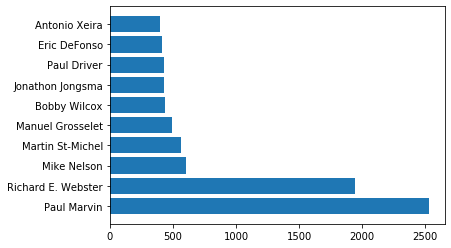

In [5]:
plt.barh(train['recordist'].value_counts()[:10].index, train['recordist'].value_counts()[:10].values)

In [6]:
train['playback_used'].hasnans

True

([<matplotlib.patches.Wedge at 0x1508b141d30>,
 [Text(-1.0316568267018542, 0.3816859860139755, 'no'),
  Text(0.9932698111823226, -0.4726680465123842, 'Not Defined'),
  Text(1.0955676014984408, -0.09864902709582897, 'yes')])

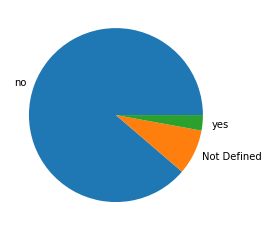

In [7]:
train['playback_used'].fillna('Not Defined', inplace=True)
plt.pie(train['playback_used'].value_counts(), labels=train['playback_used'].value_counts().index)

<BarContainer object of 11 artists>

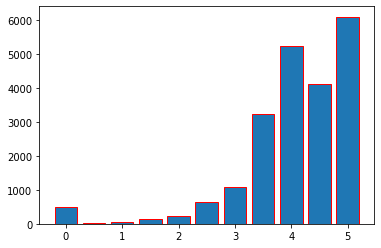

In [8]:
plt.bar(train.rating.value_counts().index, train.rating.value_counts().values, edgecolor='red',width=0.4)

<BarContainer object of 3465 artists>

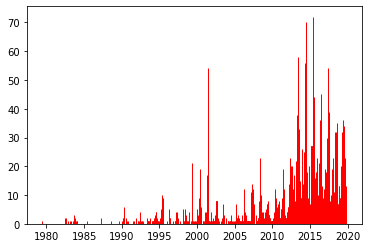

In [9]:
train['date'] = train['date'].apply(pd.to_datetime,format='%Y-%m-%d', errors='coerce')
plt.bar(train['date'].value_counts().index, train['date'].value_counts().values,edgecolor='red',width=0.4)

In [10]:
train['species'].value_counts()[:10]

Cactus Wren               100
Pine Warbler              100
Savannah Sparrow          100
Anna's Hummingbird        100
Vesper Sparrow            100
American Robin            100
Chestnut-sided Warbler    100
White-throated Sparrow    100
Loggerhead Shrike         100
Rose-breasted Grosbeak    100
Name: species, dtype: int64

In [27]:
example_audio_path = "data/train_audio/aldfly/XC134874.mp3"
x, sr = librosa.load(example_audio_path)

In [28]:
print(x.shape, sr)

(562011,) 22050


In [29]:
ipd.Audio(example_audio_path)

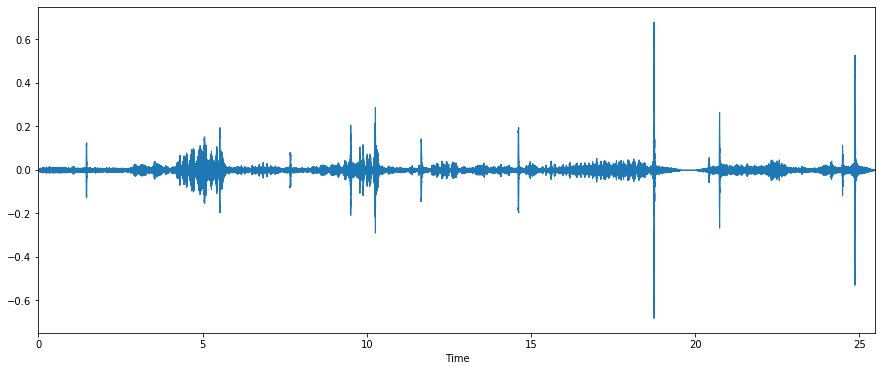

In [30]:
plt.figure(figsize=(15,6))
libdisp.waveplot(x, sr=sr)

C:\CODE\Anaconda\envs\tf\lib\site-packages\librosa\core\spectrum.py:959: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


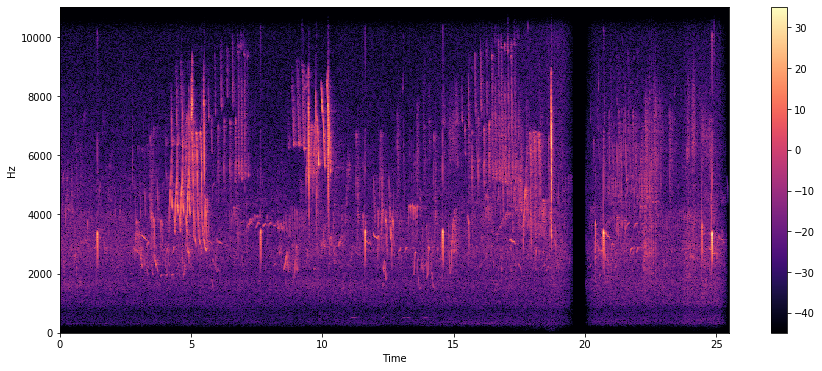

In [32]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(15,6))
libdisp.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

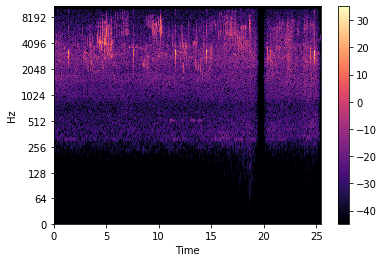

In [35]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

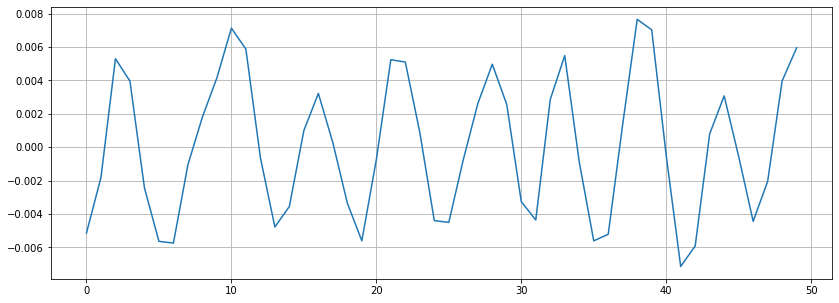

In [37]:
n0 = 9000
n1 = 9050
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()